# Download Dataset for Project

## Thư viện

In [2]:
import os
import glob
import torchvision
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
from aijack.utils import NumpyDataset

import warnings
warnings.filterwarnings("ignore")

## Data 

1. MNIST  -  (LeNet hoặc MLP) ko cần resnet vì ảnh đơn giản
- Loại dữ liệu: Ảnh chữ số viết tay (đen trắng).
- Kích thước ảnh: 28x28 pixel, 1 kênh (grayscale).
- Số lớp: 10 (các chữ số từ 0 đến 9).
- Số lượng mẫu: 70,000 (60,000 ảnh huấn luyện, 10,000 ảnh kiểm tra).
----------
2. LFW (Labeled Faces in the Wild)  -  (ResNet hoặc FaceNet)
- Loại dữ liệu: Ảnh khuôn mặt (màu, RGB).
- Kích thước ảnh: 62x47 pixel, 3 kênh (RGB).
- Số lớp:
- Phụ thuộc vào chế độ sử dụng:
- Binary classification: Nhận diện cặp ảnh có cùng danh tính hay không.
- Multi-class classification: Phân loại dựa trên danh tính (5,749 danh tính trong dataset đầy đủ).
- Số lượng mẫu: 13,233 ảnh khuôn mặt từ 5,749 người.
-----------
3. CIFAR-100  -  (ResNet và LFW)
- Loại dữ liệu: Ảnh màu (RGB).
- Kích thước ảnh: 32x32 pixel, 3 kênh (RGB).
- Số lớp: 100 (mỗi lớp chứa 600 ảnh).
- Số lượng mẫu: 60,000 (50,000 ảnh huấn luyện, 10,000 ảnh kiểm tra).

In [2]:
def PrintInfomation(dataloader, shape_img, num_classes, channel, hidden, num_seeds, num_data = 1):
    print("Shape of images:", shape_img)
    print("Number of classes:", num_classes)
    print("Number of channels:", channel)
    print("Hidden layer size:", hidden)
    print("Number of seeds:", num_seeds)

    # Lấy một batch từ dataloader
    for images, labels in dataloader:
        print("-----------------")
        print("Batch size:", images.size(0))
        print("Image shape:", images.shape)  # (batch_size, channels, height, width)
        print("Labels shape:", labels.shape)  # (batch_size,)
        break

    print()

    for i, data in enumerate(dataloader):
        if i < num_data:
            xs, ys = data[0], data[1]
            
            x = xs[:1]
            y = ys[:1]

            fig = plt.figure(figsize=(1, 1))
            plt.axis("off")
            plt.imshow(x.detach().numpy()[0][0], cmap="gray")
            plt.show()
        else:
            break

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:03<00:00, 2.53MB/s]


Extracting dataset/MNIST/./MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 106kB/s]


Extracting dataset/MNIST/./MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:07<00:00, 232kB/s] 


Extracting dataset/MNIST/./MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.17MB/s]


Extracting dataset/MNIST/./MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/./MNIST/raw

Shape of images: (28, 28)
Number of classes: 10
Number of channels: 1
Hidden layer size: 588
Number of seeds: 5
-----------------
Batch size: 64
Image shape: torch.Size([64, 1, 28, 28])
Labels shape: torch.Size([64])



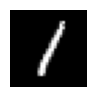

In [3]:
# MNIST
def prepare_dataloader_MNIST(path="dataset/MNIST/.", batch_size=64, shuffle=True):
    at_t_dataset_train = torchvision.datasets.MNIST(
        root=path, train=True, download=True
    )

    transform = transforms.Compose(
        [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))] # MNIST chỉ có 1 channel
    )

    dataset = NumpyDataset(
        at_t_dataset_train.data.numpy(),
        at_t_dataset_train.targets.numpy(),
        transform=transform,
    )

    dataloader = DataLoader(
        dataset, batch_size=batch_size, shuffle=shuffle, num_workers=0
    )

    shape_img = (28, 28)
    num_classes = 10
    channel = 1
    hidden = 588

    num_seeds = 5

    return dataloader, shape_img, num_classes, channel, hidden, num_seeds

# Xuất những thông tin cơ bản
dataloader, shape_img, num_classes, channel, hidden, num_seeds = prepare_dataloader_MNIST()
PrintInfomation(dataloader, shape_img, num_classes, channel, hidden, num_seeds)

100%|██████████| 169M/169M [01:34<00:00, 1.78MB/s] 


Extracting dataset/CIFAR100/./cifar-100-python.tar.gz to dataset/CIFAR100/.
Shape of images: (32, 32)
Number of classes: 100
Number of channels: 3
Hidden layer size: 768
Number of seeds: 5
-----------------
Batch size: 64
Image shape: torch.Size([64, 3, 32, 32])
Labels shape: torch.Size([64])



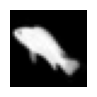

In [4]:
# CIFAR-100
def prepare_dataloader_CIFAR100(path="dataset/CIFAR100/.", batch_size=64, shuffle=True):
    at_t_dataset_train = torchvision.datasets.CIFAR100(
        root=path, train=True, download=True
    )

    transform = transforms.Compose(
        [transforms.ToTensor(), transforms.Normalize(mean=(0.5071, 0.4867, 0.4408), std=(0.2675, 0.2565, 0.2761))]
    )

    dataset = NumpyDataset(
        at_t_dataset_train.data,  # Dữ liệu CIFAR-100
        at_t_dataset_train.targets,  # Nhãn CIFAR-100
        transform=transform,
    )

    dataloader = DataLoader(
        dataset, batch_size=batch_size, shuffle=shuffle, num_workers=0
    )

    shape_img = (32, 32)
    num_classes = 100  # Số lớp cho CIFAR-100
    channel = 3  # Số kênh đầu vào cho CIFAR-100
    hidden = 768  # Có thể điều chỉnh giá trị này nếu cần

    num_seeds = 5

    return dataloader, shape_img, num_classes, channel, hidden, num_seeds

# Xuất những thông tin cơ bản
dataloader, shape_img, num_classes, channel, hidden, num_seeds = prepare_dataloader_CIFAR100()
PrintInfomation(dataloader, shape_img, num_classes, channel, hidden, num_seeds)

100%|██████████| 243M/243M [06:22<00:00, 636kB/s]  


Extracting dataset/LFW/./lfw-py/lfw-funneled.tgz to dataset/LFW/./lfw-py


100%|██████████| 66.4k/66.4k [00:00<00:00, 112kB/s]


100%|██████████| 94.7k/94.7k [00:00<00:00, 116kB/s]


Shape of images: (62, 47)
Number of classes: 4038
Number of channels: 3
Hidden layer size: 768
Number of seeds: 5
-----------------
Batch size: 64
Image shape: torch.Size([64, 3, 250, 250])
Labels shape: torch.Size([64])



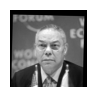

In [5]:
# LFW
def prepare_dataloader_LFW(path="dataset/LFW/.", batch_size=64, shuffle=True):
    from torchvision.datasets import LFWPeople
    from torchvision import transforms

    transform = transforms.Compose(
        [
            transforms.ToTensor(),  # Chuyển đổi ảnh sang tensor
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),  # Chuẩn hóa ảnh
        ]
    )

    dataset = torchvision.datasets.LFWPeople(
        root=path, split="train", download=True, transform=transform
    )

    dataloader = DataLoader(
        dataset, batch_size=batch_size, shuffle=shuffle, num_workers=0
    )

    # Cấu hình cho LFW dataset
    shape_img = (62, 47)  # Kích thước ảnh LFW
    num_classes = len(set(dataset.targets))  # Số lượng người trong dataset LFW
    channel = 3  # Số kênh đầu vào (ảnh màu)
    hidden = 768  # Số lượng ẩn (có thể điều chỉnh)

    num_seeds = 5

    return dataloader, shape_img, num_classes, channel, hidden, num_seeds

# Xuất những thông tin cơ bản
dataloader, shape_img, num_classes, channel, hidden, num_seeds = prepare_dataloader_LFW()
PrintInfomation(dataloader, shape_img, num_classes, channel, hidden, num_seeds)

In [ ]:
# xoá file txt trong dataset LFW, chỉ lấy thư mục hình ảnh
for file in glob.glob(os.path.join("dataset/LFW/lfw-py/lfw_funneled", "*.txt")):
    os.remove(file)
    print(f"Đã xoá: {file}")